In [82]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
import numpy as np
import matplotlib.pyplot as plt

In [83]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"using PyTorch version: {torch.__version__}, Device: {DEVICE}")

using PyTorch version: 2.3.0+cu121, Device: cuda


In [84]:
fashion_mnist_transform = transforms.Compose([transforms.ToTensor(),
                                              transforms.Normalize(mean=(0.5), std=(0.5))])

In [85]:
train_set = datasets.FashionMNIST(root='./FASHION10_data/',
                                  train = True,
                                  download = True,
                                  transform = fashion_mnist_transform)
test_set = datasets.FashionMNIST(root ='./FASHION10_data/',
                                 train = False,
                                 download = True,
                                 transform = fashion_mnist_transform)

print(len(train_set), type(train_set))
print(len(test_set), type(test_set))

100%|██████████| 26421880/26421880 [00:05<00:00, 4563019.67it/s]


Extracting ./FASHION10_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./FASHION10_data/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 102386.91it/s]


Extracting ./FASHION10_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./FASHION10_data/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:09<00:00, 480363.46it/s] 


Extracting ./FASHION10_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./FASHION10_data/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./FASHION10_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./FASHION10_data/FashionMNIST\raw

60000 <class 'torchvision.datasets.mnist.FashionMNIST'>
10000 <class 'torchvision.datasets.mnist.FashionMNIST'>


In [86]:
train_loader = DataLoader(train_set,
                          batch_size = 128,
                          shuffle = True,
                          num_workers = 2)
test_loader = DataLoader(test_set,
                         batch_size = 128,
                         shuffle = False,
                         num_workers = 2)

In [87]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])


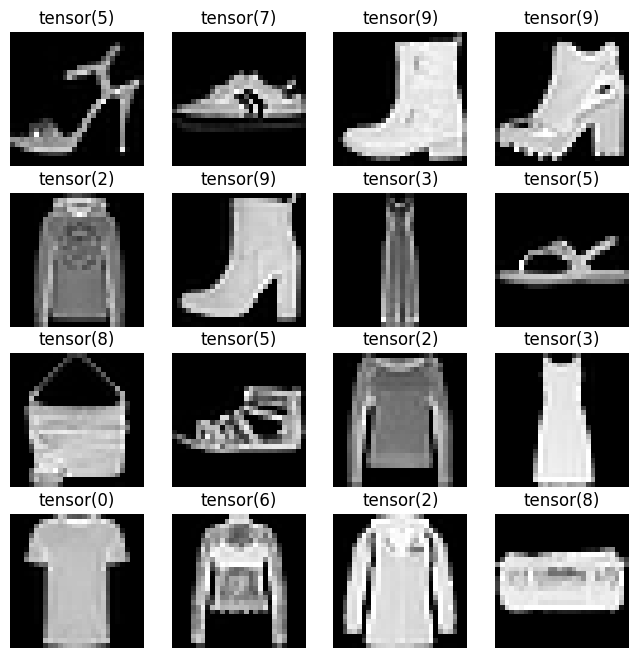

In [88]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(8, 8))
random_idx = np.random.randint(0, images.shape[0], size=16)
for i, idx in enumerate(random_idx) :
    img = images[idx].squeeze()
    label = labels[idx]
    plt.subplot(4, 4, i+1)
    plt.imshow(img, 'gray')
    plt.title(label)
    plt.axis('off')
plt.show()

torch.Size([128, 1, 28, 28]) torch.Size([128])


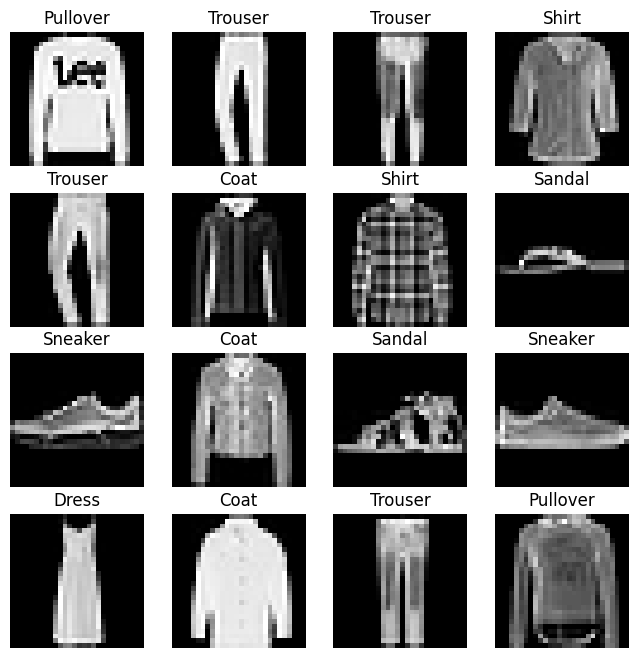

In [107]:
images, labels = next(iter(test_loader))
print(images.shape, labels.shape)

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(1, rows*cols+1) :
  img = images[i].squeeze()
  label_idx = labels[i].item()
  label = label_map[label_idx]
  plt.subplot(rows, cols, i+1)
  plt.imshow(img, 'gray')
  plt.title(label)
  plt.axis('off')
plt.show()

In [90]:
import torch.nn.functional as F


class NeuralNet(nn.Module) :
    def __init__(self) :
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10)

    def forward(self, x) :
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)


In [91]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [93]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 469


In [94]:
for epoch in range(10) :

  running_loss = 0.0 

  for i , data in enumerate(train_loader, 0) :
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i% 100 == 99 :
      print('Epoch: {}, iter: {}, Loss: {}' .format (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('Finished Training')

Epoch: 1, iter: 100, Loss: 0.11509549558162689
Epoch: 1, iter: 200, Loss: 0.11479056930541992
Epoch: 1, iter: 300, Loss: 0.11429215717315674
Epoch: 1, iter: 400, Loss: 0.11350215351581573
Epoch: 2, iter: 100, Loss: 0.10967401146888733
Epoch: 2, iter: 200, Loss: 0.10136856317520142
Epoch: 2, iter: 300, Loss: 0.07930760908126831
Epoch: 2, iter: 400, Loss: 0.053823112815618517
Epoch: 3, iter: 100, Loss: 0.03854275611042977
Epoch: 3, iter: 200, Loss: 0.03680439305305481
Epoch: 3, iter: 300, Loss: 0.03384806677699089
Epoch: 3, iter: 400, Loss: 0.033784711986780167
Epoch: 4, iter: 100, Loss: 0.03244620148837567
Epoch: 4, iter: 200, Loss: 0.03119654220342636
Epoch: 4, iter: 300, Loss: 0.030281517058610916
Epoch: 4, iter: 400, Loss: 0.029568348810076715
Epoch: 5, iter: 100, Loss: 0.029065897300839423
Epoch: 5, iter: 200, Loss: 0.02930910414457321
Epoch: 5, iter: 300, Loss: 0.028322445705533026
Epoch: 5, iter: 400, Loss: 0.028559557616710664
Epoch: 6, iter: 100, Loss: 0.027557165771722795
Epoch

In [96]:
def imshow(image) :
  image = image /2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16, 8))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

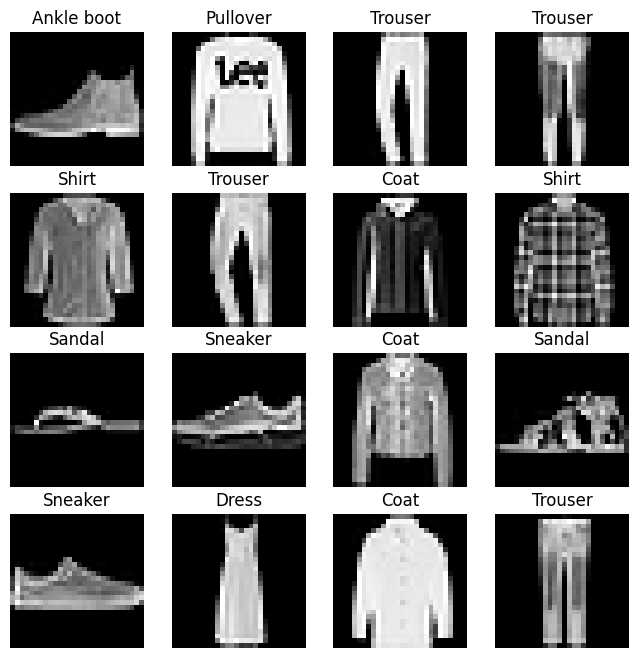

In [110]:
images, labels = next(iter(test_loader))

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(16) :
  img = images[i].squeeze()
  label_idx = labels[i].item()
  label = label_map[label_idx]
  plt.subplot(rows, cols, i+1)
  plt.imshow(img, 'gray')
  plt.title(label)
  plt.axis('off')
plt.show()

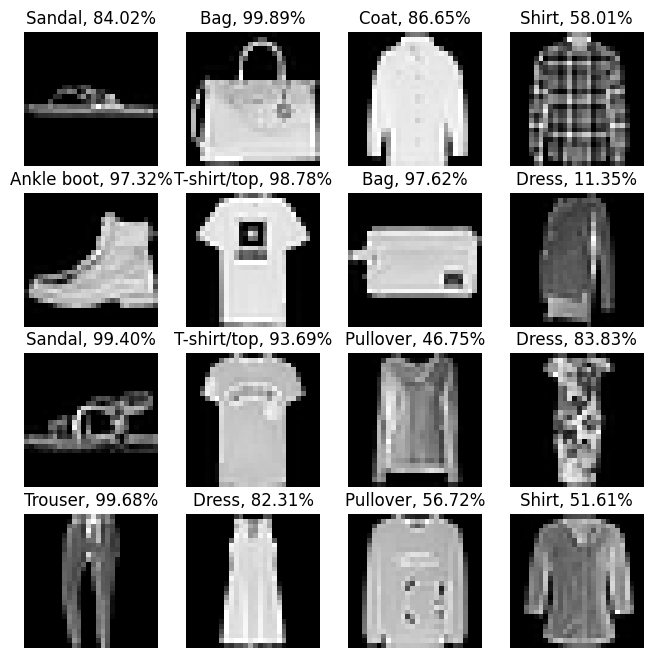

In [117]:
images, labels = next(iter(test_loader))

label_map = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}


plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, 128, size=16)

for i, idx in enumerate(random_idx):
    img = images[idx].numpy().squeeze()
    label = labels[idx].item()
    output = net(images[idx].unsqueeze(0))  # 이미지를 모델에 전달하여 예측 결과를 얻습니다.
    probabilities = F.softmax(output, dim=1)  # 소프트맥스 함수를 적용하여 확률값으로 변환합니다.
    prediction = torch.argmax(output, dim=1).item()
    predicted_label = label_map[prediction]
    correct_probability = probabilities[0, label].item() * 100  # 정답을 맞춘 확률을 가져옵니다.
    plt.subplot(4, 4, i+1)
    plt.imshow(img, 'gray')
    plt.title(f'{predicted_label}, {correct_probability:.2f}%')
    plt.axis('off')

plt.show()

In [98]:
outputs =net(images)

_, predicted = torch.max(outputs, 1)
print(predicted[:6])

tensor([9, 2, 1, 1, 6, 1])


In [99]:
print(''.join(['{}.'.format(label_map[int(predicted[j].numpy())]) for j in range(6)]))

Ankle boot.Pullover.Trouser.Trouser.Shirt.Trouser.


In [100]:
correct = 0
total = 0

with torch.no_grad() :
  for data in test_loader :
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted ==labels).sum().item()

print(100*correct/ total)

82.74
